In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)

Mounted at /content/drive


In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.metrics import log_loss, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt


In [ ]:
kaon_data = pd.read_feather("/content/drive/MyDrive/Colab Notebooks/kaon_mdst.feather")
pion_data = pd.read_feather("/content/drive/MyDrive/Colab Notebooks/pion_mdst.feather")
pion_df = pion_data[['LL_11_SVD','LL_13_SVD','LL_211_SVD',
          'LL_321_SVD','LL_2212_SVD','LL_1000010020_SVD',
          'LL_11_CDC','LL_13_CDC','LL_211_CDC',
          'LL_321_CDC','LL_2212_CDC','LL_1000010020_CDC',
          'LL_11_ECL','LL_13_ECL','LL_211_ECL',
          'LL_321_ECL','LL_2212_ECL','LL_1000010020_ECL',
          'LL_11_TOP','LL_13_TOP','LL_211_TOP',
          'LL_321_TOP','LL_2212_TOP','LL_1000010020_TOP',
          'LL_11_ARICH','LL_13_ARICH','LL_211_ARICH',
          'LL_321_ARICH','LL_2212_ARICH','LL_1000010020_ARICH',
          'LL_11_KLM','LL_13_KLM','LL_211_KLM',
          'LL_321_KLM','LL_2212_KLM','LL_1000010020_KLM', 'p', 'phi', 'cosTheta', 'charge','isSignal']].copy(deep = True)
kaon_df=kaon_data[['LL_11_SVD','LL_13_SVD','LL_211_SVD',
          'LL_321_SVD','LL_2212_SVD','LL_1000010020_SVD',
          'LL_11_CDC','LL_13_CDC','LL_211_CDC',
          'LL_321_CDC','LL_2212_CDC','LL_1000010020_CDC',
          'LL_11_ECL','LL_13_ECL','LL_211_ECL',
          'LL_321_ECL','LL_2212_ECL','LL_1000010020_ECL',
          'LL_11_TOP','LL_13_TOP','LL_211_TOP',
          'LL_321_TOP','LL_2212_TOP','LL_1000010020_TOP',
          'LL_11_ARICH','LL_13_ARICH','LL_211_ARICH',
          'LL_321_ARICH','LL_2212_ARICH','LL_1000010020_ARICH',
          'LL_11_KLM','LL_13_KLM','LL_211_KLM',
          'LL_321_KLM','LL_2212_KLM','LL_1000010020_KLM', 'p', 'phi', 'cosTheta', 'charge','isSignal']].copy(deep = True)

In [ ]:
kaon_df['isSignal']=0
pion =pd.concat([kaon_df,pion_df])

# replacing the NaN values with mean of the column
pion=pion.fillna(pion.mean())

In [ ]:
# Normalizing the data
columns_to_normalize = ["cosTheta", "phi", "p",'charge']
columns_to_normalize_ll=['LL_11_SVD', 'LL_13_SVD', 'LL_211_SVD', 'LL_321_SVD', 'LL_2212_SVD',
       'LL_1000010020_SVD', 'LL_11_CDC', 'LL_13_CDC', 'LL_211_CDC',
       'LL_321_CDC', 'LL_2212_CDC', 'LL_1000010020_CDC', 'LL_11_ECL',
       'LL_13_ECL', 'LL_211_ECL', 'LL_321_ECL', 'LL_2212_ECL',
       'LL_1000010020_ECL', 'LL_11_TOP', 'LL_13_TOP', 'LL_211_TOP',
       'LL_321_TOP', 'LL_2212_TOP', 'LL_1000010020_TOP', 'LL_11_ARICH',
       'LL_13_ARICH', 'LL_211_ARICH', 'LL_321_ARICH', 'LL_2212_ARICH',
       'LL_1000010020_ARICH', 'LL_11_KLM', 'LL_13_KLM', 'LL_211_KLM',
       'LL_321_KLM', 'LL_2212_KLM', 'LL_1000010020_KLM']

def normalize_column(column):
    # Normalizes a DataFrame column using the formula x' i = (xi - mean(xi)) / std(xi).
    mean = column.mean()
    std = column.std()
    return (column - mean) / std
for col in columns_to_normalize:
    pion[col] = normalize_column(pion[col])

def normalize_column_ll(column):
    # Normalizes a DataFrame column using the formula x' i = (xi - mean(xi)) / std(xi) if not NaN else replace with 1
    if column.isnull().all():
        return np.ones_like(column)
    else:
        std =column.std()
        return (column/std)
for col in columns_to_normalize_ll:
    kaon_data[col] = normalize_column(kaon_data[col])

# splitting the data into train and test sets
X_train, X_valid, Y_train, Y_valid=train_test_split(pion.drop(['isSignal'],axis=1),pion.isSignal,test_size=0.3,random_state=42)

In [ ]:
# splitting the data into train and test sets
X_train, X_valid, Y_train, Y_valid=train_test_split(pion.drop(['isSignal'],axis=1),pion.isSignal,test_size=0.3,random_state=42)

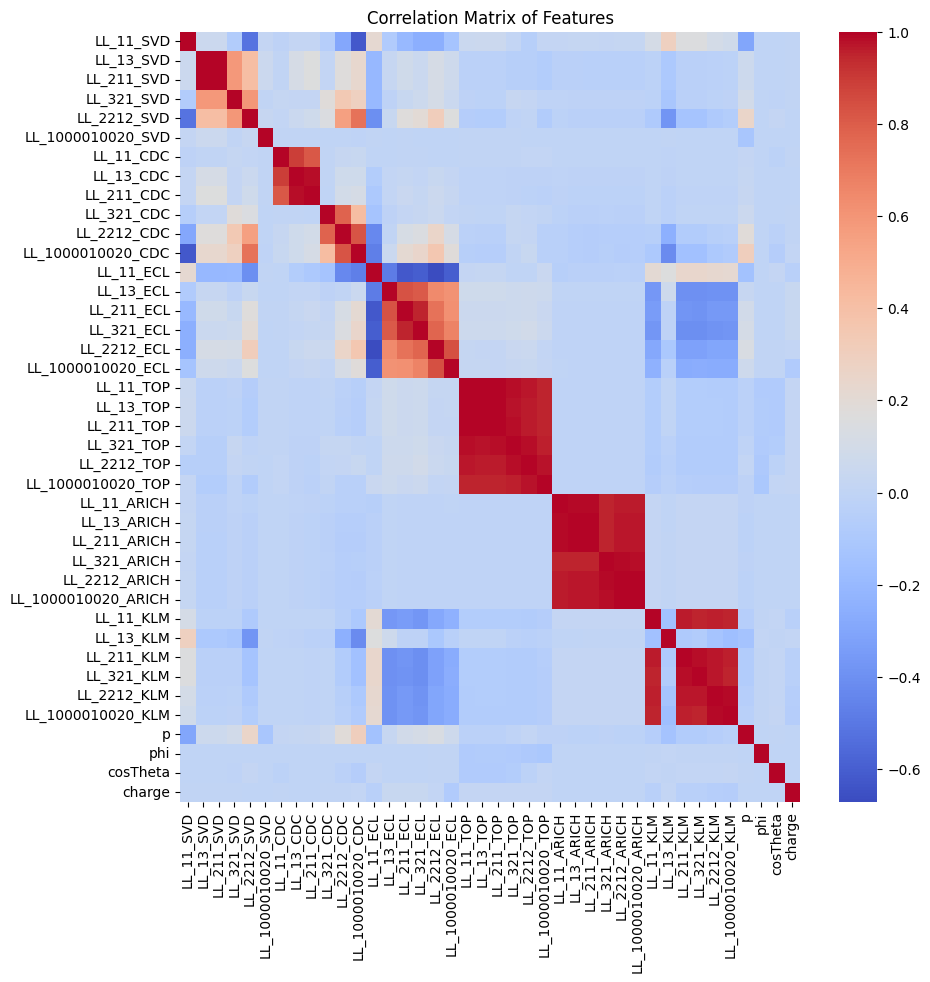

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
from google.colab import files

# Assuming you have your X_train data

# Calculate correlation matrix
corr_matrix = X_train.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 10))  # Adjust figure size as needed
sns.heatmap(corr_matrix,cmap="coolwarm")
plt.title('Correlation Matrix of Features')
plt.show()
plt.savefig("correlation_matrix.png")
files.download("correlation_matrix.png")

In [ ]:
# Random Forest
model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

Y_pred1 = model1.predict(X_valid)
accuracy = accuracy_score(Y_valid, Y_pred1)
print("Accuracy for Random Forest:", accuracy)

y_pred_proba1 = model1.predict_proba(X_valid)

Accuracy for Random Forest: 0.8742092176977162


In [ ]:
# Bagging classifier
model2 = BaggingClassifier()
model2.fit(X_train, Y_train)

Y_pred2 = model2.predict(X_valid)
accuracy = accuracy_score(Y_valid, Y_pred2)
print("Accuracy for Bagging classifier:", accuracy)

y_pred_proba2 = model2.predict_proba(X_valid)

Accuracy for Bagging classifier: 0.8789843737135894


In [ ]:
# XG Boost
model3 = xgb.XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,subsample=0.5)
model3.fit(X_train, Y_train)

Y_pred3 = model3.predict(X_valid)
accuracy = accuracy_score(Y_valid, Y_pred3)
print("Accuracy for XG Boost:", accuracy)

y_pred_proba3 = model3.predict_proba(X_valid)

Accuracy for XG Boost: 0.8950552436152871


<Axes: >

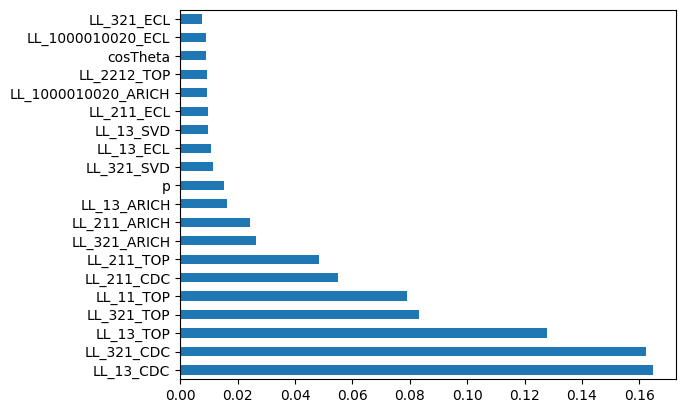

In [ ]:
feat_importances = pd.Series(model3.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

<ipython-input-19-130b911307f0>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(center, hist, yerr=err, fmt='.k', c='r', label='P (test)')
<ipython-input-19-130b911307f0>:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(center, hist, yerr=err, fmt='.k', c='b', label='K (test)')


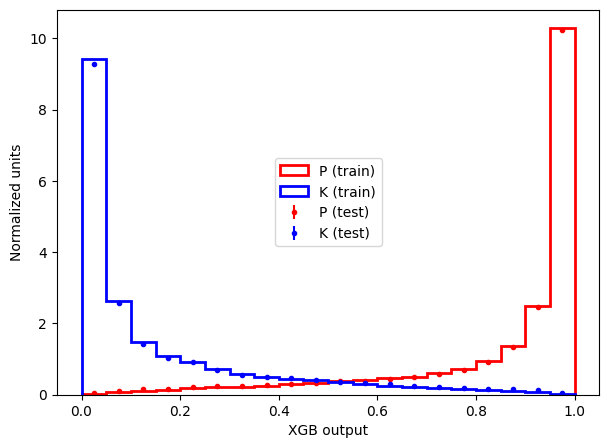

In [ ]:
def compare_train_test(clf, X_train, y_train, X_test, y_test, bins=20):
    decisions = []
    for X,y in ((X_train, y_train), (X_test, y_test)):
         d1 = clf.predict_proba(X[y>0.5])[:, 1].ravel()
         d2 = clf.predict_proba(X[y<0.5])[:, 1].ravel()
         decisions += [d1, d2]

    low = min(np.min(d) for d in decisions)
    high = max(np.max(d) for d in decisions)
    low_high = (low,high)
    plt.subplots(figsize=(7,5))
    plt.hist(decisions[0],
             color='r', range=(0,1), bins=bins,
             histtype='step', density=1,
             label='P (train)',lw=2)
    plt.hist(decisions[1],
             color='b',range=(0,1), bins=bins,
             histtype='step', density=1,
             label='K (train)',lw=2)

    hist, bins = np.histogram(decisions[2],
                              bins=bins, range=(0,1), density=1)
    scale = len(decisions[2]) / sum(hist)
    err = np.sqrt(hist * scale) / scale

    width = (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.errorbar(center, hist, yerr=err, fmt='.k', c='r', label='P (test)')

    hist, bins = np.histogram(decisions[3],
                              bins=bins, range=(0,1), density=1)
    scale = len(decisions[2]) / sum(hist)
    err = np.sqrt(hist * scale) / scale

    plt.errorbar(center, hist, yerr=err, fmt='.k', c='b', label='K (test)')

    plt.xlabel("XGB output")
    plt.ylabel("Normalized units")
    plt.legend(loc='center')
    plt.savefig("Xgboutput.png", bbox_inches="tight")

compare_train_test(model3, X_train, Y_train, X_valid, Y_valid, bins=20)

In [ ]:
# Likelihood
l_pion_1 = pion_data.L_211_ALL.to_numpy()
l_pion_2 = pion_data.L_321_ALL.to_numpy()
pi_eff=[]
K_fake=[]
total=521585
eps = 0.001
t=np.arange(0, 1+eps,0.001)
for k in t:
    m=0
    for i in l_pion_1:
        if i>=k: m+=1
    pief = m/total
    if k==1:
      print(m)
      print(pief)
    pi_eff.append(pief)
for k in t:
    n=0
    for i in l_pion_2:
        if i>=k: n+=1
    kf = n/total
    if k == 1: print(n)
    if k==1: print(kf)
    K_fake.append(kf)
print(min(K_fake), max(K_fake))
print(min(pi_eff), max(pi_eff))

279
0.0005349080207444616
184
0.00035277088106444777
0.00035277088106444777 0.9999980827669508
0.0005349080207444616 0.9999980827669508


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

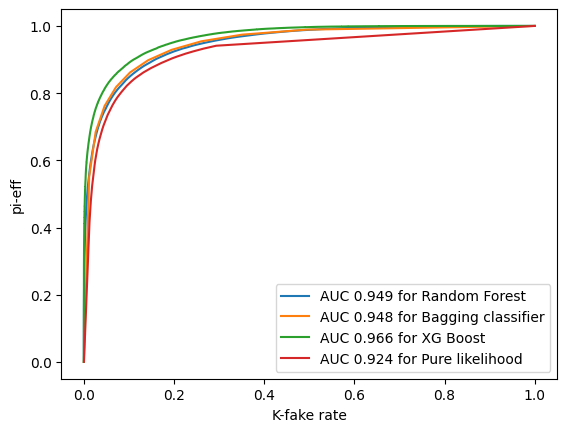

In [ ]:
from sklearn.metrics import log_loss, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

models = ["Random Forest", "Bagging classifier","XG Boost"]
# Calculate ROC AUC
y_pred_proba = [y_pred_proba1, y_pred_proba2, y_pred_proba3]
fpr_list, tpr_list, roc_list = [], [], []
for proba in y_pred_proba:
  roc_auc_score(Y_valid, proba[:,1])
  fpr, tpr, thresholds = roc_curve(Y_valid, proba[:,1])
  roc_auc = auc(fpr, tpr)
  fpr_list.append(fpr)
  tpr_list.append(tpr)
  roc_list.append(roc_auc)

# Plot the ROC curve
for i in range(len(fpr_list)):
  roc_auc_i = "{:.3f}".format(roc_list[i])
  plt.plot(fpr_list[i], tpr_list[i], label= f"AUC {roc_auc_i} for {models[i]}")
plt.xlabel("K-fake rate")
plt.ylabel("pi-eff")
roc_auc = auc(K_fake, pi_eff)
roc_auc = "{:.3f}".format(roc_auc)
plt.plot(K_fake,pi_eff,label= f"AUC {roc_auc} for Pure likelihood")
plt.legend()
plt.savefig("roc_for_all.png")
files.download("roc_for_all.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

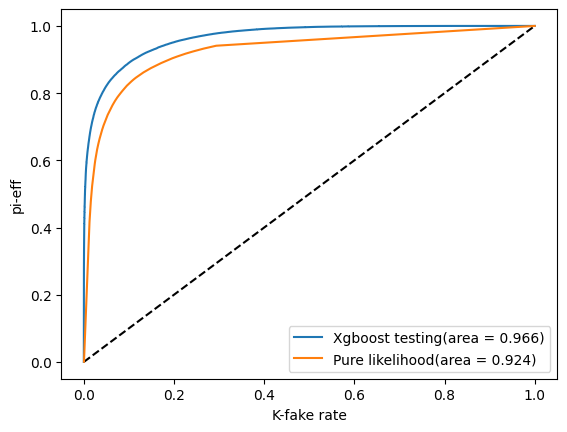

In [ ]:
from sklearn.metrics import log_loss, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
y_pred_proba_train3 = model3.predict_proba(X_train)
fpr2, tpr2, thresholds2 = roc_curve(Y_valid,y_pred_proba3[:,1])
roc_auc2=auc(fpr2,tpr2)

roc_auc = auc(K_fake, pi_eff)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr2, tpr2, label='Xgboost testing(area = %0.3f)' % roc_auc2)
roc_auc = "{:.3f}".format(roc_auc)
plt.plot(K_fake,pi_eff,label=f"Pure likelihood(area = {roc_auc})")
plt.legend()
plt.xlabel("K-fake rate")
plt.ylabel("pi-eff")
plt.savefig("roc_for_xgb_likelihood.png")
files.download("roc_for_xgb_likelihood.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

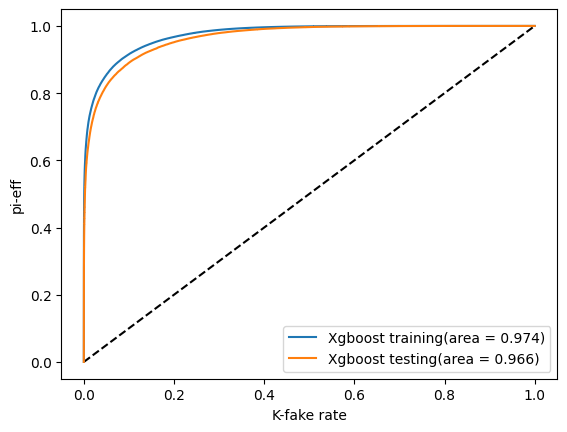

In [ ]:
from sklearn.metrics import log_loss, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
y_pred_proba_train3 = model3.predict_proba(X_train)
fpr1, tpr1, thresholds1 = roc_curve(Y_train,y_pred_proba_train3[:,1])
fpr2, tpr2, thresholds2 = roc_curve(Y_valid,y_pred_proba3[:,1])
roc_auc1=auc(fpr1,tpr1)
roc_auc2=auc(fpr2,tpr2)

roc_auc = auc(K_fake, pi_eff)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label='Xgboost training(area = %0.3f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Xgboost testing(area = %0.3f)' % roc_auc2)
roc_auc = "{:.3f}".format(roc_auc)
# plt.plot(K_fake,pi_eff,label=f"Pure likelihood(area = {roc_auc})")
plt.legend()
plt.xlabel("K-fake rate")
plt.ylabel("pi-eff")
plt.savefig("roc_for_xgb.png")
files.download("roc_for_xgb.png")